# Типовое исследование по дисциплине «Технологии машинного обучения»

## Гранин М.М.

Выбран датасет [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification "Перейти на сайт") 

About Dataset

Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int6

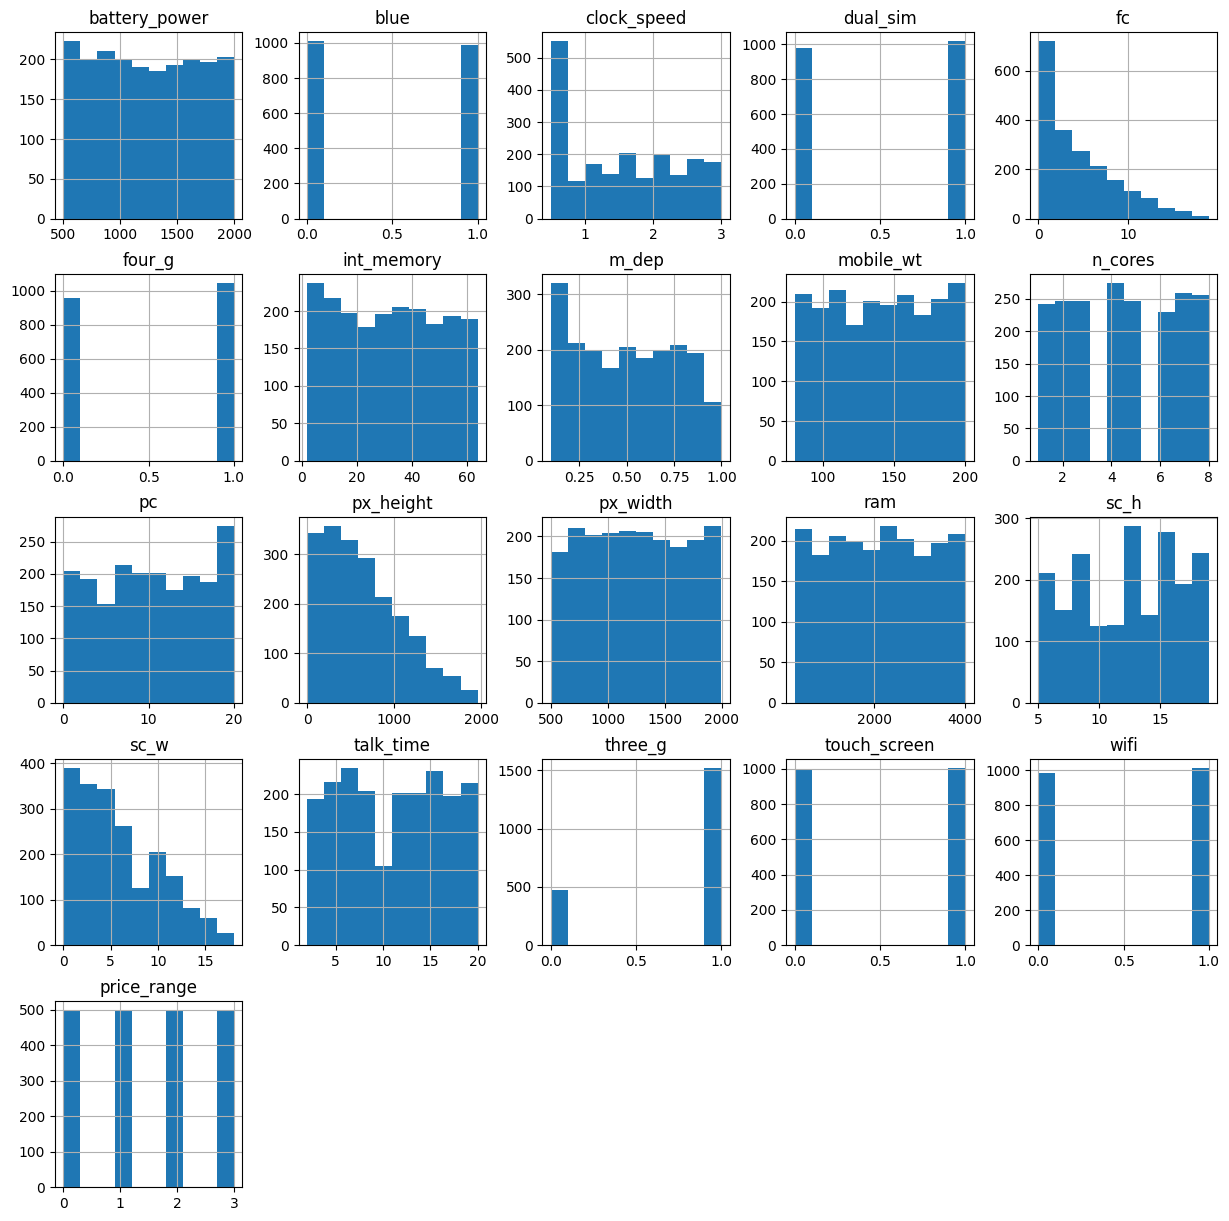

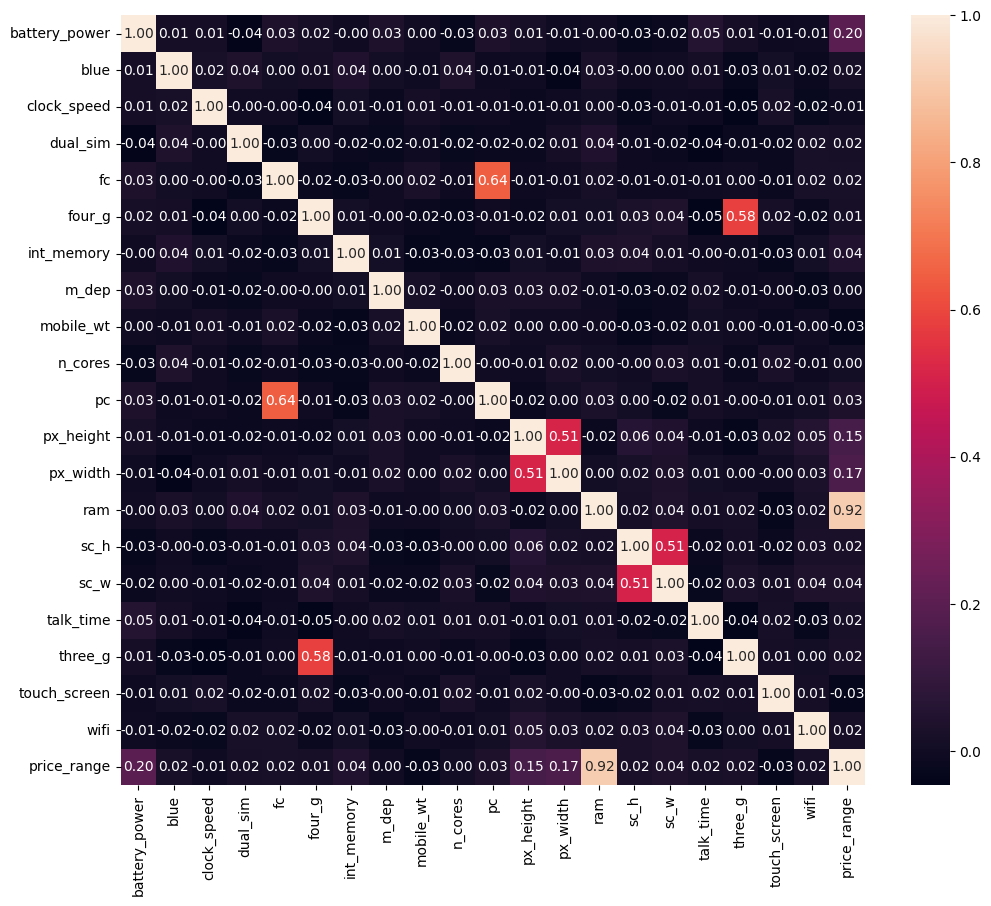

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Разведочный анализ данных
print("Train data info:")
print(train_df.info())
print("\nTrain data description:")
print(train_df.describe())

print("\nTest data info:")
print(test_df.info())
print("\nTest data description:")
print(test_df.describe())

# Проверка на пропуски
print("\nMissing values in train data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Заполнение пропусков (если есть)
# В данном наборе данных пропусков нет, но на всякий случай пример:
# train_df.fillna(method='ffill', inplace=True)
# test_df.fillna(method='ffill', inplace=True)

# Построение гистограмм для числовых признаков
train_df.hist(figsize=(15, 15))
plt.show()

# Построение матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
plt.show()


## 2. Выбор признаков, кодирование категориальных признаков и масштабирование данных

In [2]:
# Выбор признаков
features = train_df.drop(columns=['price_range'])
target = train_df['price_range']

# Кодирование категориальных признаков (если есть)
# В данном наборе данных категориальные признаки закодированы численно

# Масштабирование данных
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Преобразование данных в DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Проверка масштабированных данных
print("\nScaled features description:")
print(features_scaled_df.describe())



Scaled features description:
       battery_power          blue   clock_speed      dual_sim            fc  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.149392e-16 -1.243450e-17 -1.545430e-16  8.082424e-17  5.861978e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.678817e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.928904e-01   
25%    -8.804033e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.624947e-01   
50%    -2.849593e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.017032e-01   
75%     8.575560e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.198797e-01   
max     1.728812e+00  1.010051e+00  1.811412e+00  9.811771e-01  3.384628e+00   

             four_g    int_memory         m_dep     mobile_wt       n_cores  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.048051e-16 -9.592327e-17 -1.030287e-16  1.278977e-16 -7.727152e-17   
std    1.000

## 3. Проведение корреляционного анализа данных

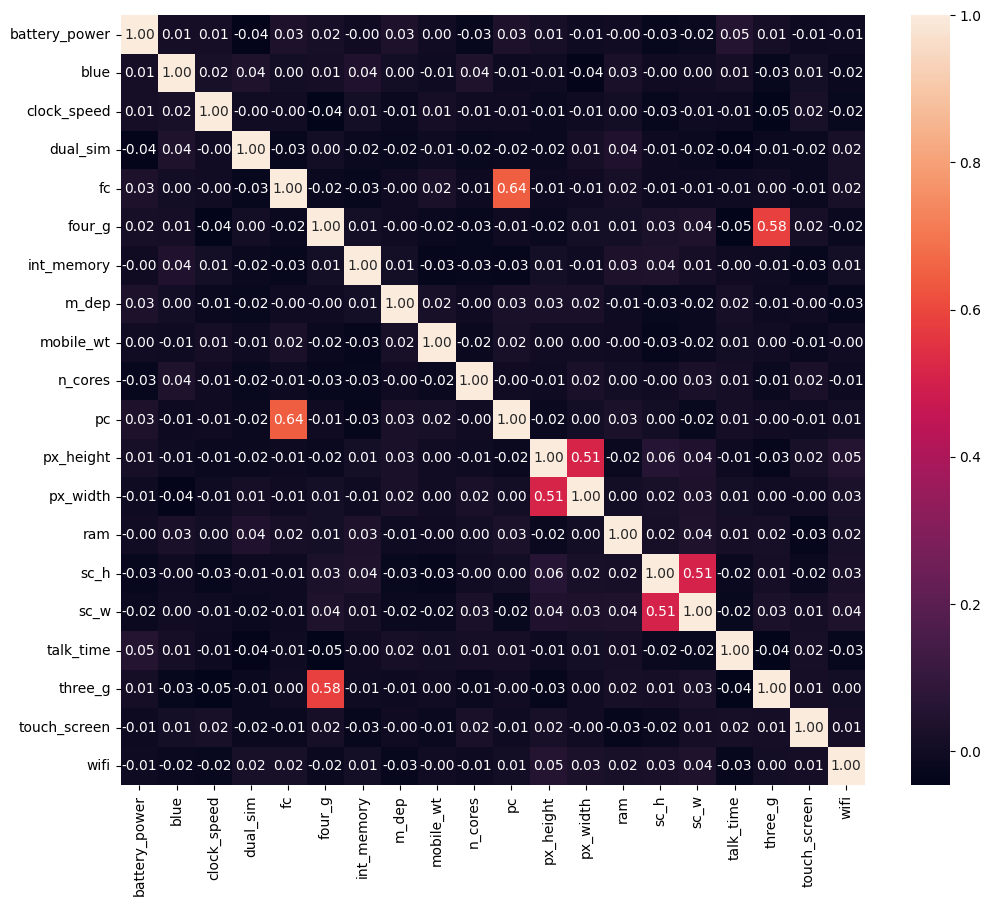

На основе корреляционного анализа можно сделать вывод, что существует определенная зависимость между признаками и целевой переменной, что позволяет использовать их для построения моделей машинного обучения.


In [3]:
# Проведение корреляционного анализа данных
plt.figure(figsize=(12, 10))
sns.heatmap(features_scaled_df.corr(), annot=True, fmt=".2f")
plt.show()

# Промежуточные выводы
print("На основе корреляционного анализа можно сделать вывод, что существует определенная зависимость между признаками и целевой переменной, что позволяет использовать их для построения моделей машинного обучения.")


## 5. Выбор метрик для последующей оценки качества моделей

In [4]:
# Выбор метрик
# Метрики для классификации: accuracy, precision, recall, F1-score

# Обоснование выбора метрик
print("Метрики для оценки качества моделей будут включать:")
print("1. Accuracy - доля правильных предсказаний.")
print("2. Precision - точность положительных предсказаний.")
print("3. Recall - полнота положительных предсказаний.")
print("4. F1-score - гармоническое среднее precision и recall.")


Метрики для оценки качества моделей будут включать:
1. Accuracy - доля правильных предсказаний.
2. Precision - точность положительных предсказаний.
3. Recall - полнота положительных предсказаний.
4. F1-score - гармоническое среднее precision и recall.


## 6. Выбор моделей

In [5]:
# Выбор моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Ансамблевые модели включают Random Forest и Gradient Boosting


## 7. Формирование обучающей и тестовой выборок

In [6]:
# Формирование обучающей и тестовой выборок
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Train set size: (1600, 20)
Test set size: (400, 20)


## 8. Построение базового решения (baseline)

In [7]:
# Построение базового решения
baseline_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    baseline_results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Вывод результатов
baseline_results_df = pd.DataFrame(baseline_results).T
print("\nBaseline results:")
print(baseline_results_df)



Baseline results:
                     Accuracy  Precision  Recall  F1 Score
Logistic Regression    0.9775   0.978169  0.9775  0.977490
Random Forest          0.8775   0.879855  0.8775  0.877963
Gradient Boosting      0.9075   0.908793  0.9075  0.907919
Decision Tree          0.8350   0.837387  0.8350  0.834159
K-Nearest Neighbors    0.5300   0.568217  0.5300  0.540123


## 9. Подбор гиперпараметров с использованием GridSearchCV

In [8]:
# Пример для Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Лучшие параметры
best_params_rf = grid_search_rf.best_params_
print("\nBest parameters for Random Forest:")
print(best_params_rf)



Best parameters for Random Forest:
{'max_depth': None, 'n_estimators': 200}


## 10. Повторение базового решения с оптимальными гиперпараметрами

In [9]:
# Повторное обучение Random Forest с оптимальными параметрами
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# Оценка качества
best_rf_results = {
    'Accuracy': accuracy_score(y_test, y_pred_best_rf),
    'Precision': precision_score(y_test, y_pred_best_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_best_rf, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_best_rf, average='weighted')
}

# Вывод результатов
print("\nBest Random Forest results:")
print(best_rf_results)



Best Random Forest results:
{'Accuracy': 0.8925, 'Precision': 0.8940780321516819, 'Recall': 0.8925, 'F1 Score': 0.8929297189051004}


## 11. Формирование выводов


Comparison of baseline and best results:
                     Accuracy  Precision  Recall  F1 Score
Logistic Regression    0.9775   0.978169  0.9775  0.977490
Random Forest          0.8775   0.879855  0.8775  0.877963
Gradient Boosting      0.9075   0.908793  0.9075  0.907919
Decision Tree          0.8350   0.837387  0.8350  0.834159
K-Nearest Neighbors    0.5300   0.568217  0.5300  0.540123
Best Random Forest     0.8925   0.894078  0.8925  0.892930


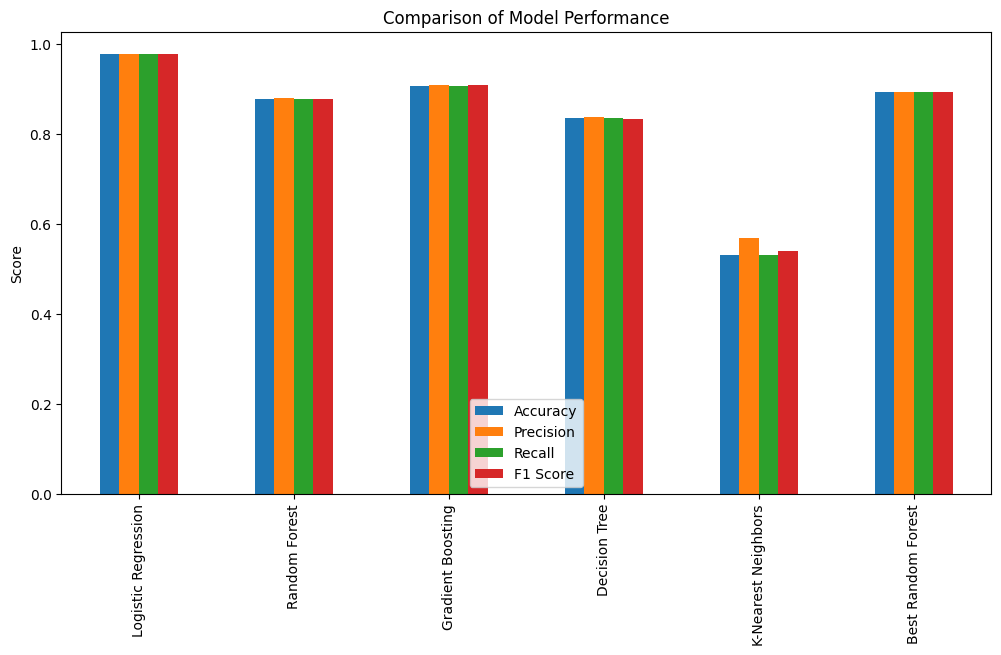

На основе проведенного анализа можно сделать вывод, что модель Random Forest с оптимальными гиперпараметрами показала лучшие результаты по сравнению с baseline моделями.


In [10]:
# Сравнение baseline и лучших результатов
comparison_df = pd.concat([baseline_results_df, pd.DataFrame({'Best Random Forest': best_rf_results}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T])
print("\nComparison of baseline and best results:")
print(comparison_df)

# Построение графиков
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.show()

# Выводы
print("На основе проведенного анализа можно сделать вывод, что модель Random Forest с оптимальными гиперпараметрами показала лучшие результаты по сравнению с baseline моделями.")
